In [36]:
# importing required libraries
import os #provides functions for interacting with the operating system
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [44]:
tips_raw = pd.read_csv("tips.csv")

In [46]:
# make a copy of data 
tips=tips_raw.copy()

In [48]:
# run all the data
tips
# run the first 5 rows
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [50]:
# get number of rows and columns
tips.shape

(244, 7)

In [52]:
tips.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [54]:
# get information about a dataset (dtype, non-null values, memory usage)
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [56]:
for col in tips.columns[2:6]:
    print(col, np.unique(tips[col]))

sex ['Female' 'Male']
smoker ['No' 'Yes']
day ['Fri' 'Sat' 'Sun' 'Thur']
time ['Dinner' 'Lunch']


In [58]:
# detect missing values
tips.isna().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [115]:
tips.describe() # only for numerical variables 
tips.describe().T # transpose

df = pd.read_csv("tips.csv")  # Replace with your actual dataset

# Calculate the average of a particular column (e.g., "total_bill")
average_total_bill = df["total_bill"].mean()

# Print the result in bold and color
BOLD_GREEN = "\033[1;32m"
RESET = "\033[0m"

print(f"{BOLD_GREEN}✔️ Average Total Bill: {average_total_bill:.2f} {RESET}")


✔️ Average Total Bill: 19.79 


📊 BAR CHART 📊


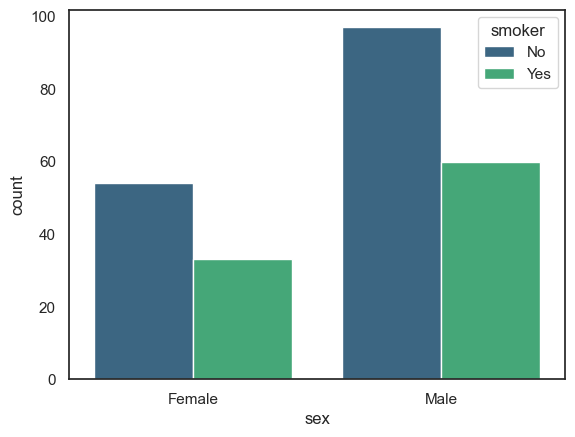

In [105]:
sns.countplot(x='sex', data=tips, hue='smoker', palette='viridis')
# Define ANSI escape codes for colors and bold text
BOLD_RED = "\033[1;31m"
RESET = "\033[0m"
print(f"{BOLD_RED}📊 BAR CHART 📊{RESET}")


In [65]:
# correlation matrix
tips.corr(numeric_only=True)


,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


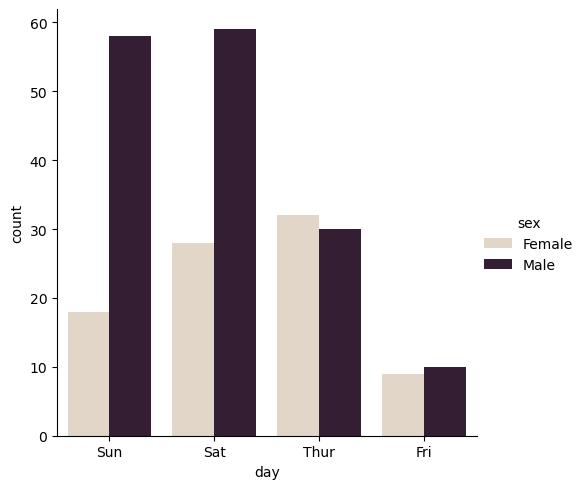

In [71]:
sns.catplot(x='day', data=tips, hue='sex', palette='ch:.25', kind='count')

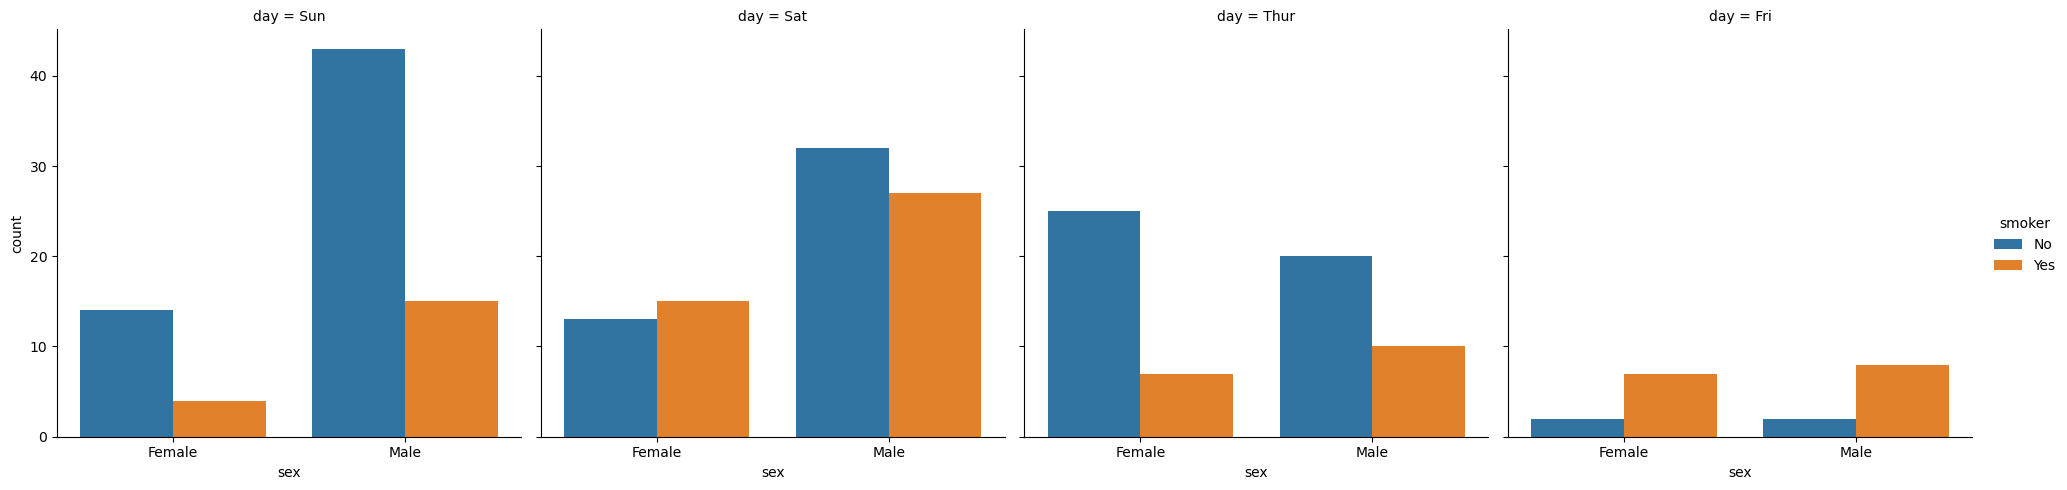

In [73]:
sns.catplot(x='sex', hue='smoker', col='day', data=tips, kind='count')

📊 SCATTER PLOT 📊


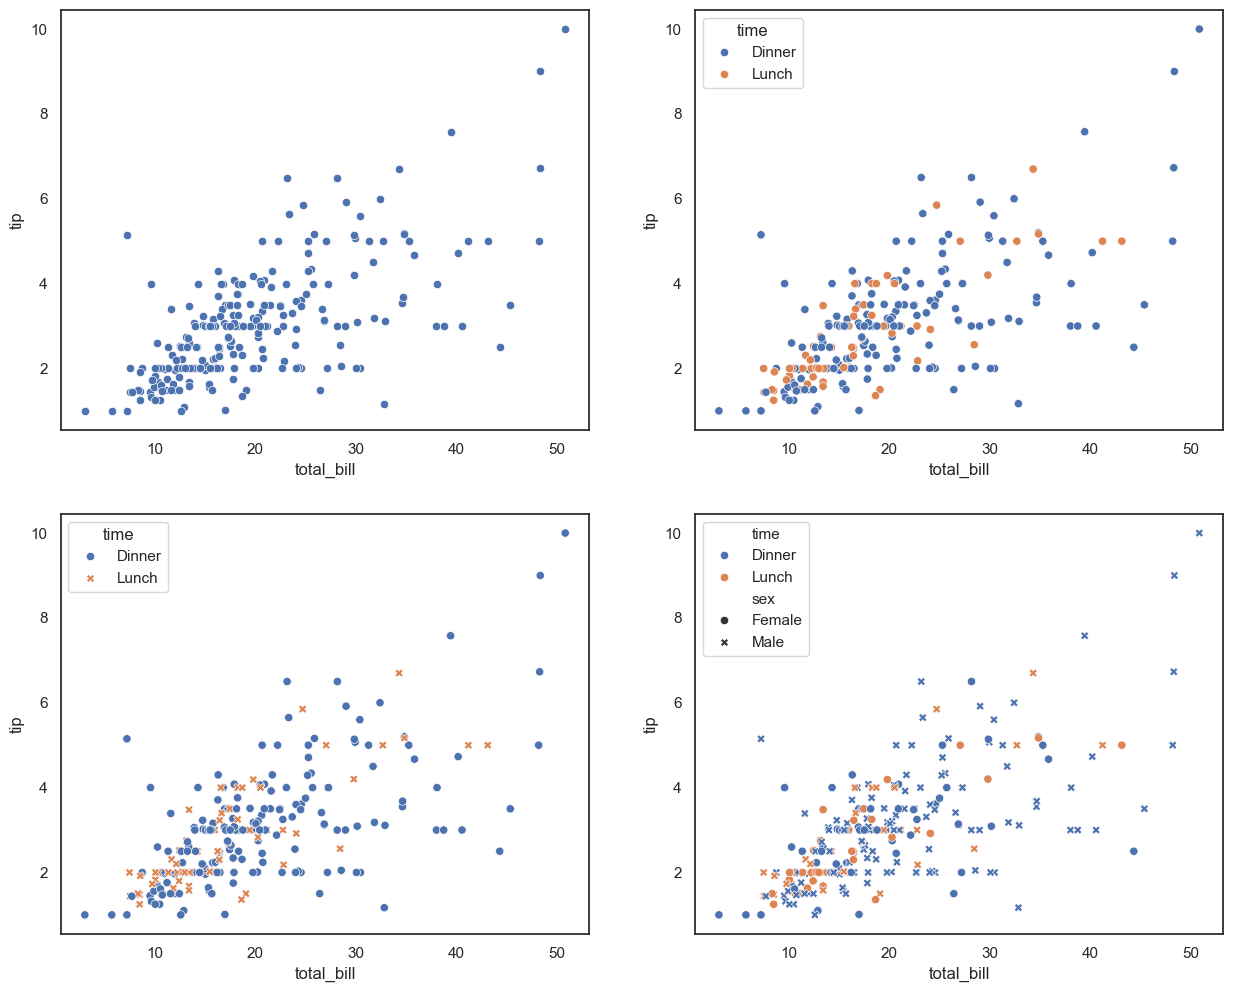

In [107]:
fig, axes = plt.subplots(2, 2, figsize=(15,12)) # plot 4 graphs 

# simple scatter plot between two variables 
sns.scatterplot(x='total_bill', y='tip', data=tips, ax=axes[0,0])

# group by time and show the groups with different colors
sns.scatterplot(x ='total_bill', y ='tip', data = tips, hue= 'time', ax=axes[0,1])

# variable time by varying both color and marker
sns.scatterplot(x ='total_bill', y ='tip', data = tips, hue='time', style= 'time', ax=axes[1,0])

# vary colors and markers to show two different grouping variables
sns.scatterplot(x = 'total_bill', y = 'tip', hue= 'time', style= 'sex', data = tips)
BOLD_RED = "\033[1;31m"
RESET = "\033[0m"
print(f"{BOLD_RED}📊 SCATTER PLOT 📊{RESET}")

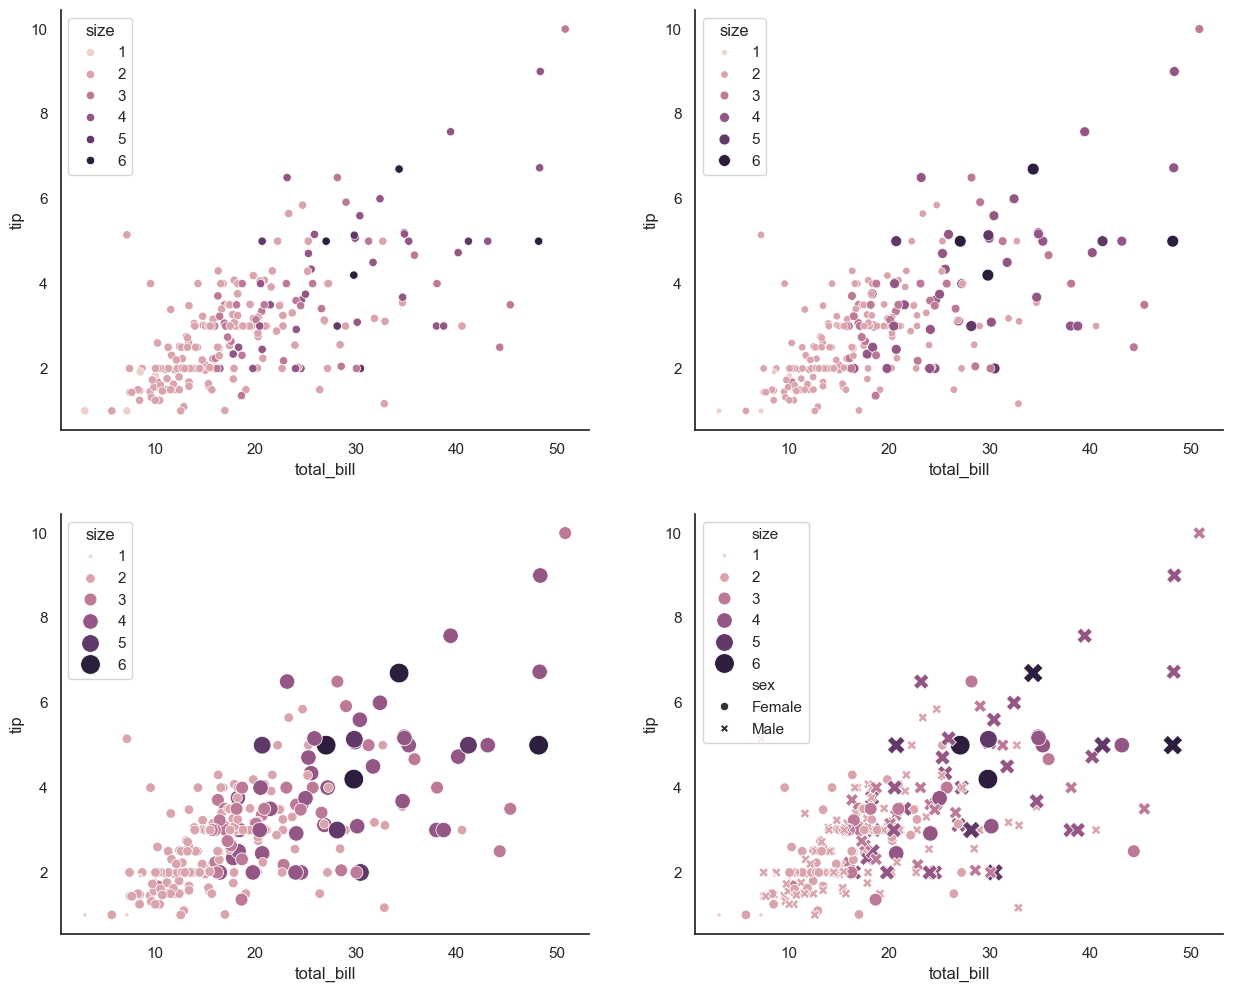

In [77]:
sns.set(style='white') #set background

fig, axes = plt.subplots(2, 2, figsize=(15,12)) # plot 4 graphs 

# vary colors to show one grouping variable-size
sns.scatterplot(x='total_bill', y='tip', data=tips, hue='size', ax=axes[0,0])

# quantitative variable-size by varying the size of the points
sns.scatterplot(x='total_bill', y='tip', data=tips, hue='size', size='size', ax=axes[0,1])

# set the minimum and maximum point size and show all sizes in legend
sns.scatterplot(x='total_bill', y='tip', data=tips, hue='size', size='size', sizes=(10,200), ax=axes[1,0])

# vary colors and markers to show two different grouping variables -size,sex
sns.scatterplot(x='total_bill', y='tip', data=tips, hue='size', size='size', style='sex', sizes=(10,200), ax=axes[1,1])
sns.despine() 


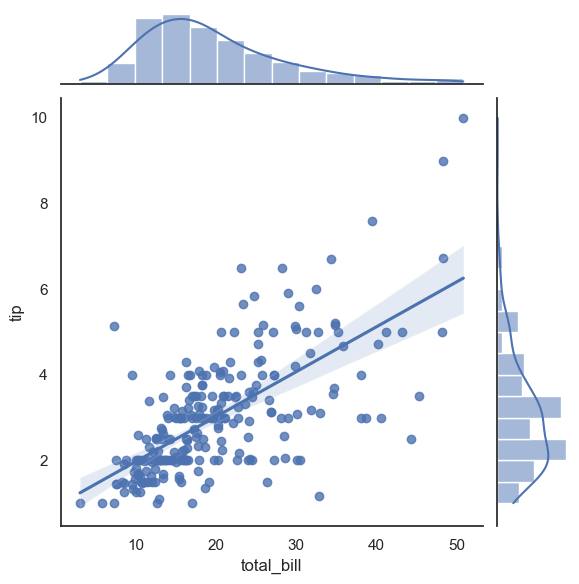

In [79]:
sns.jointplot(x='total_bill', y='tip', data=tips, kind='reg')


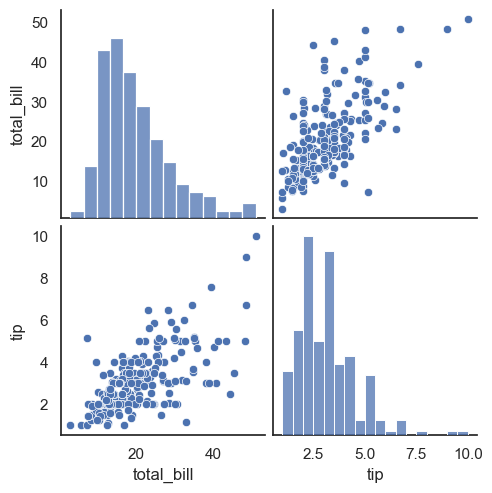

In [81]:
# select wanted variables
sns.pairplot(tips[['total_bill','tip']])  

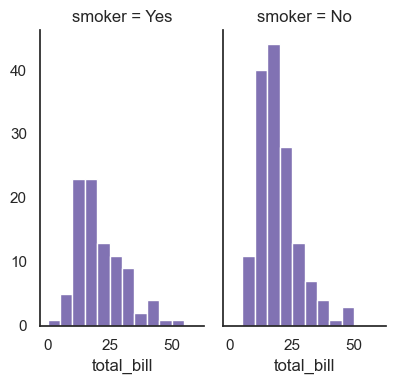

In [83]:
# specify the order, change the height and aspect ratio of each facet
bins = np.arange(0, 65, 5)
g = sns.FacetGrid(tips, col='smoker', col_order=['Yes', 'No'], height=4, aspect=.5)
g = g.map(plt.hist, 'total_bill', bins=bins, color='m').add_legend()

In [92]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [99]:
import plotly.express as px

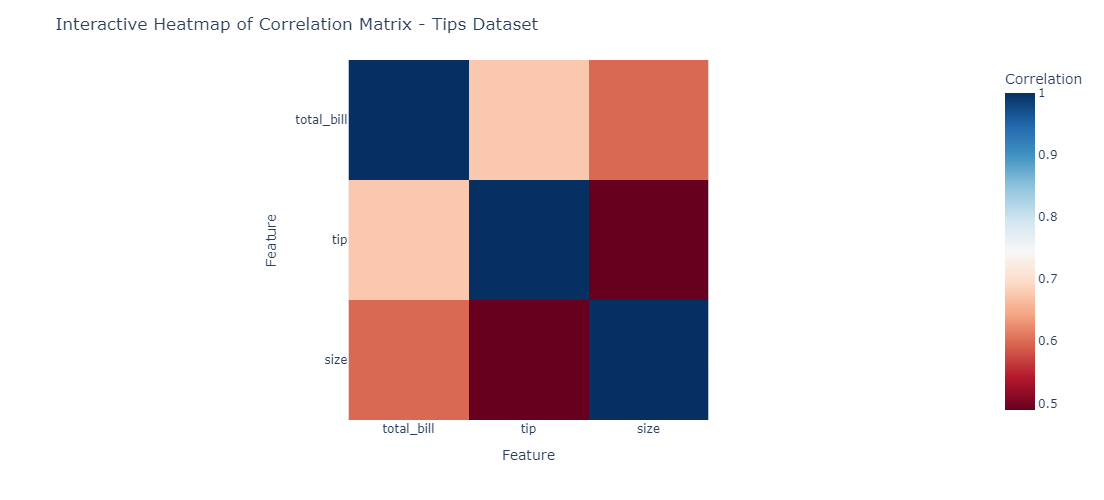

📊 HEAT MAP 📊


In [109]:
corr_matrix = tips.corr(numeric_only=True)

# Create an interactive heatmap with a valid colorscale
fig = px.imshow(
    corr_matrix, 
    labels=dict(x="Feature", y="Feature", color="Correlation"),
    x=corr_matrix.columns, 
    y=corr_matrix.index,
    color_continuous_scale="RdBu"  # ✅ Fix: Use a valid Plotly colorscale
)

# Update layout for better visibility
fig.update_layout(
    title="Interactive Heatmap of Correlation Matrix - Tips Dataset",
    width=600,
    height=500
)

# Show the interactive plot
fig.show()
BOLD_RED = "\033[1;31m"
RESET = "\033[0m"
print(f"{BOLD_RED}📊 HEAT MAP 📊{RESET}")